In [99]:
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

from climate_indices import indices,compute
from climate_indices.indices import Distribution

import PCA_functions as pf

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime, timedelta

from sklearn.cluster import AgglomerativeClustering

import scipy.stats as st
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

import seaborn as sns

In [74]:
a = np.array([[1,2],[3,1],[2.5,4]])

In [63]:
np.matmul(a,pca_model.components_[:,1])

array([ 0.70710678, -1.41421356,  1.06066017])

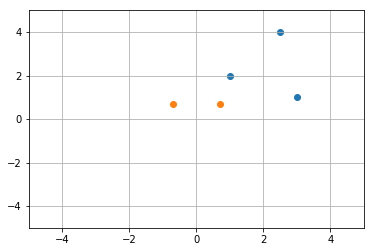

In [87]:
plt.scatter(a[:,0], a[:,1])
plt.scatter(pca_model.components_[0,:], pca_model.components_[1,:])
#pca_model.components_
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()

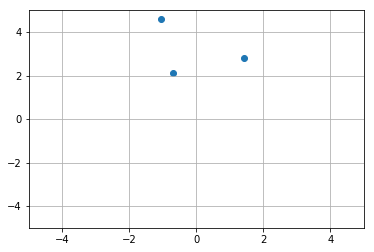

In [57]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()

In [14]:
w,v = np.linalg.eig(a)

In [15]:
v[:,1]

array([-0.63245553,  0.77459667])

In [11]:
w[1]

5.372281323269014

In [84]:
scale = StandardScaler()
scaled_data = scale.fit_transform(a)

pca = PCA()
pca_model = pca.fit(scaled_data)

pca_data = pca_model.transform(a)

In [85]:
pca_data

array([[-0.70710678,  2.12132034],
       [ 1.41421356,  2.82842712],
       [-1.06066017,  4.59619408]])

In [98]:
pca_model.components_[0]

array([ 0.70710678, -0.70710678])

In [95]:
a[:,1].std()

1.247219128924647

In [3]:
n_components = 5
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 

In [100]:
d = Data('GPCC_half.nc','precip',temporal_limits, missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [17]:
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lat_min":9.25,"lat_max":9.25,"lon_min":22.25,"lon_max":22.25}
d = Data('GPCC_half.nc','precip',temporal_limits,spatial_limits,missing_value=-9.969209968386869e+36)

x = d.get_data()
x = np.squeeze(np.asarray(x))

In [7]:
x,avg = pf.phase_averaging(x)

In [9]:
model = AR(x)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 20
Coefficients: [ 0.00248486  0.08627118  0.00093379  0.05457984 -0.01229124 -0.03109637
 -0.0177735   0.03698771 -0.01152888  0.04334478  0.05876988  0.00431163
  0.11362403 -0.00333559  0.0211137   0.07776185  0.00273012 -0.03168465
  0.03848079 -0.00825066  0.00757433]


In [10]:
acf(x, qstat = True)

(array([ 1.00000000e+00,  9.37171172e-02,  3.20890270e-02,  7.58838304e-02,
         3.52541807e-03, -1.51144228e-02, -7.29116987e-03,  3.36325751e-02,
        -3.48995203e-03,  5.53840445e-02,  7.28239846e-02,  3.01606751e-02,
         1.22443808e-01,  2.57280016e-02,  2.61873732e-02,  9.20416756e-02,
         1.48254364e-02, -2.84620712e-02,  3.84804795e-02,  1.13141320e-02,
         5.14737565e-03,  4.42094837e-02,  1.05828957e-02,  3.75169374e-02,
         3.67072533e-03, -8.56010631e-03, -4.73486406e-02,  4.33846561e-02,
        -3.33486575e-04,  2.75882281e-02,  9.44942103e-02, -2.05936290e-03,
         5.71750768e-02,  4.96623566e-02,  2.97001460e-02,  6.52900472e-02,
         3.84590778e-02, -3.38849871e-03, -4.18111652e-02, -1.15307887e-02,
         2.72137374e-02]),
 array([ 7.2020087 ,  8.04740715, 12.78088166, 12.79111074, 12.9793599 ,
        13.02322101, 13.95763898, 13.96771285, 16.50788958, 20.90514102,
        21.66032546, 34.12221028, 34.67309664, 35.24454145, 42.3126

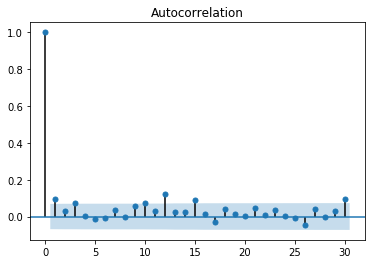

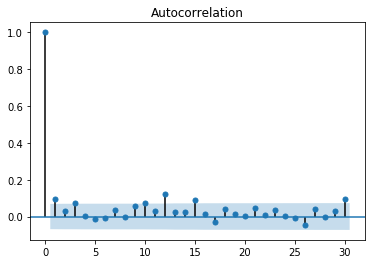

In [11]:
plot_acf(x)

('gamma', (0.3211086782755489, -3.119229936652328e-26, 57.233566272731565))

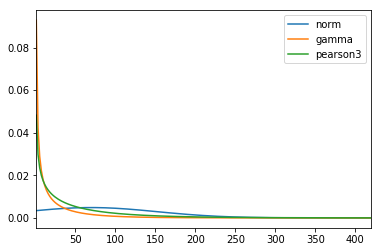

In [111]:
pf.best_fit_distribution(x)

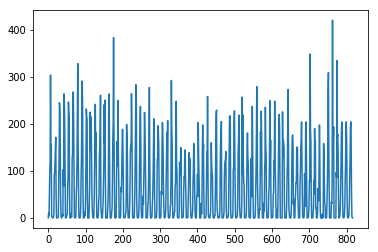

In [132]:
plt.plot(x)

In [112]:
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lat_min":-15.25,"lat_max":-15.25,"lon_min":22.25,"lon_max":22.25}
d1 = Data('GPCC_half.nc','precip',temporal_limits,spatial_limits,missing_value=-9.969209968386869e+36)

x1 = d1.get_data()
x1 = np.squeeze(np.asarray(x1))

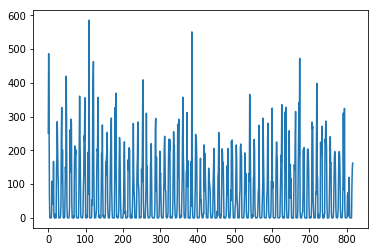

In [113]:
plt.plot(x1)

In [115]:
r = best_fit_distribution(x1)

In [116]:
r[1][0]*r[1][2]

76.70281374156079

In [117]:
x1.mean()

76.50843

In [12]:
x1.std()

101.99626

In [ ]:
pf.

In [101]:
#result = pf.deseasonalize(np.array(result))
result = np.array(result)
data = pd.DataFrame(result)

In [102]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

pca = PCA(n_components=n_components)
pca_model = pca.fit(scaled_data)

pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)

loading = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

clusters = loading.idxmax(axis=1)
df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

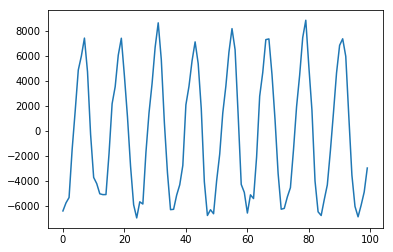

In [28]:
plt.plot(pca_data[0:100,0])

# Plot of weights of each time series

In [8]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        st.norm, st.gamma, st.pearson3,st.invgauss
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
       # try:
        #    # Ignore warnings from data that can't be fit
         #   with warnings.catch_warnings():
          #      warnings.filterwarnings('ignore')

                # fit dist to data
        params = distribution.fit(data)

                # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                #try:
                 #   if ax:
        #pd.Series(pdf, x).plot(ax=ax,legend = True, label = distribution.name)
                  #  end
               # except Exception:
                #    pass

                # identify if this distribution is better
        if best_sse > sse > 0:
            best_distribution = distribution
            best_params = params
            best_sse = sse

      #  except Exception:
     #       pass

    return (best_distribution.name, best_params)

In [12]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

In [9]:
n = 500

In [23]:
Idx = np.where(loading[0].values>0.00125)[0]
d = data.iloc[:,Idx]

In [10]:
Idx = np.where(loading[0].values>0.01)[0]
d = data.iloc[:,Idx]

d_temp = d.sample(n,axis=1)

r = []
for i in range(n):
    r.append(best_fit_distribution(d_temp.iloc[:,i].values))

In [13]:
t = []
for j in range(n):
    if r[j][0] == 'norm': 
        t.append(r[j][1][0])
    else:
        t.append(r[j][1][0]*r[j][1][2])

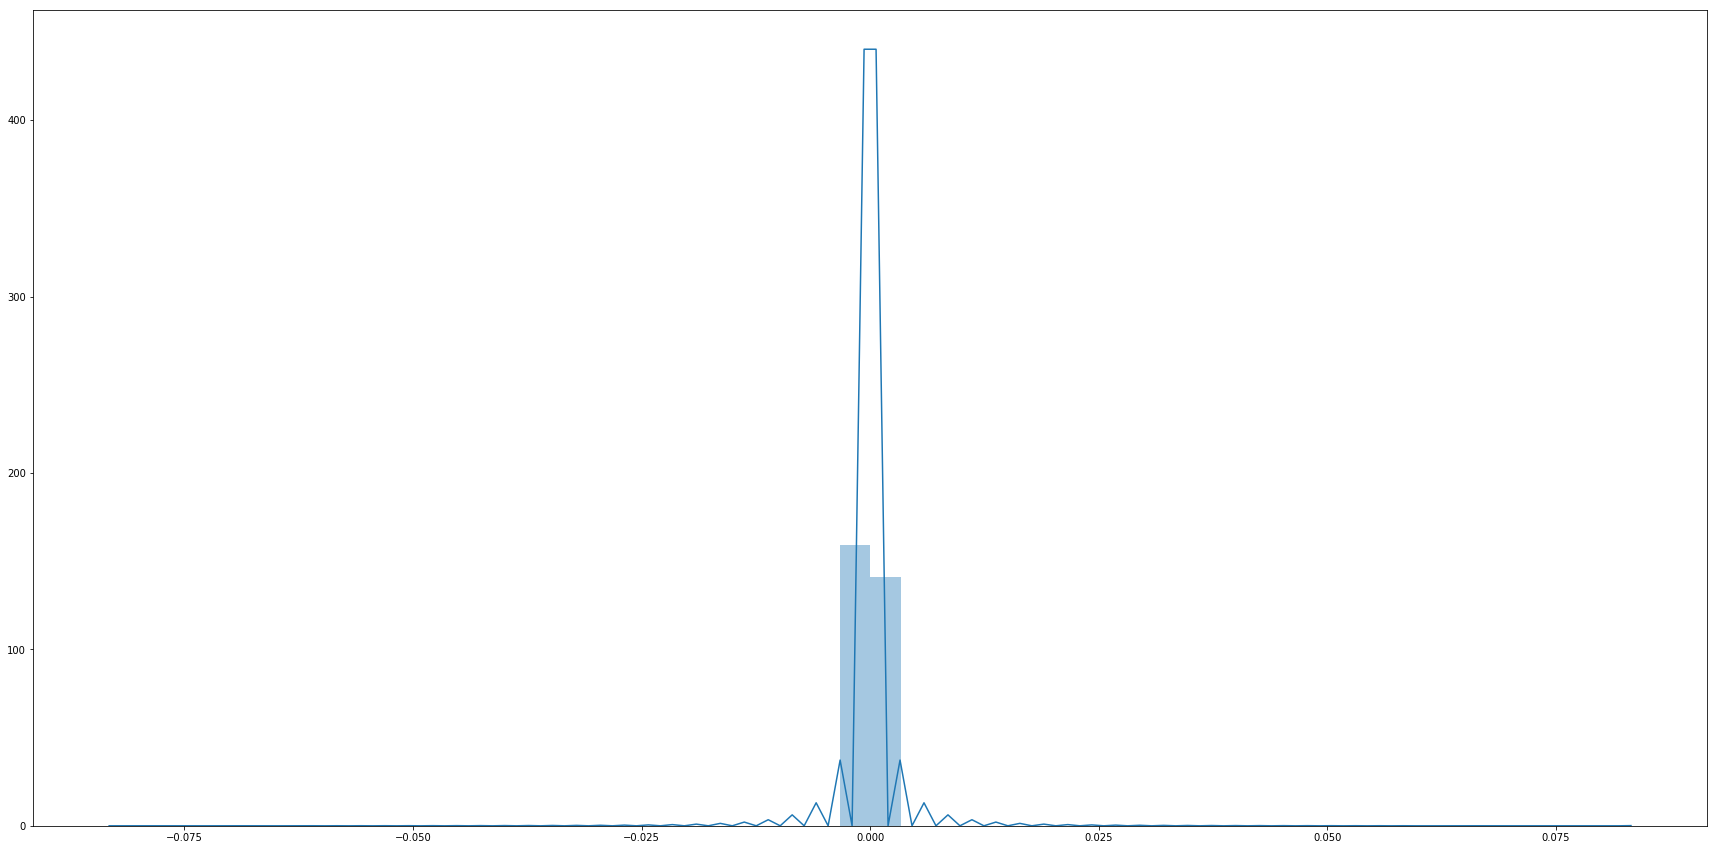

In [31]:
m = d.mean().values
plt.figure(figsize=(30,15))
sns.distplot(m)

In [11]:
m.mean()

75.929054

In [20]:
np.std(t)

37.10692030008612

In [19]:
np.mean(t)

56.886243170141015

In [17]:
t = removeOutliers(t,1.5)

(array([86., 85., 83., 69., 54., 25., 13., 11.,  1., 12.]),
 array([  4.87164696,  22.55411966,  40.23659237,  57.91906507,
         75.60153778,  93.28401049, 110.96648319, 128.6489559 ,
        146.3314286 , 164.01390131, 181.69637402]),
 <a list of 10 Patch objects>)

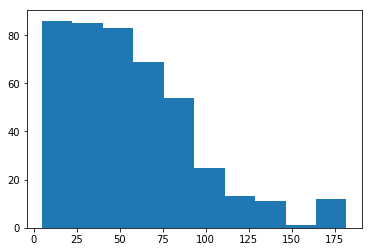

In [18]:
plt.hist(t)

In [32]:
Idx = np.where(loading[0].values<0.00125)[0]

d1 = data.iloc[:,Idx]

In [21]:
d_temp1 = d1.sample(n,axis=1)

r1 = []
for i in range(n):
    r1.append(best_fit_distribution(d_temp1.iloc[:,i].values))

In [22]:
t1 = []
for j in range(n):
    if r1[j][0] == 'norm': 
        t1.append(r1[j][1][0])
    else:
        t1.append(r1[j][1][0]*r1[j][1][2])

In [26]:
np.std(t1)

38.16143447101056

In [27]:
np.mean(t1)

73.11553824149927

(array([  3.,  25., 111., 469., 329.,  66.,  11.,   4.,   1.,   4.]),
 array([-2.10973631e-07, -1.56222351e-07, -1.01471071e-07, -4.67197913e-08,
         8.03148878e-09,  6.27827688e-08,  1.17534049e-07,  1.72285329e-07,
         2.27036609e-07,  2.81787889e-07,  3.36539169e-07]),
 <a list of 10 Patch objects>)

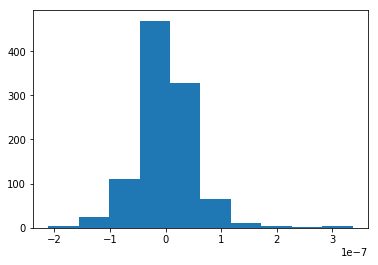

In [33]:
m1 = d1.mean().values

plt.hist(m1)

In [12]:
m1.mean()

84.60124

In [25]:
t1 = removeOutliers(t1,1.5)

(array([  6.,  20., 111., 100.,  94.,  46.,  34.,  11.,  10.,   6.]),
 array([-18.44762699,   3.95791219,  26.36345137,  48.76899055,
         71.17452973,  93.58006891, 115.98560809, 138.39114727,
        160.79668645, 183.20222563, 205.60776481]),
 <a list of 10 Patch objects>)

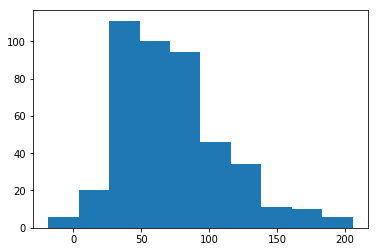

In [28]:
plt.hist(t1)

In [13]:
Idx = np.where(np.logical_and(loading[0].values>-0.005,loading[0].values<0.005))[0]
d2 = data.iloc[:,Idx]

In [171]:


d_temp2 = d2.sample(n,axis=1)

r2 = []
for i in range(n):
    r2.append(best_fit_distribution(d_temp2.iloc[:,i].values))

In [172]:
t2 = []
for j in range(n):
    if r2[j][0] == 'norm': 
        t2.append(r2[j][1][0])
    else:
        t2.append(r2[j][1][0]*r2[j][1][2])

In [173]:
np.std(t2)

45.69002438816334

In [174]:
np.mean(t2)

23.512342895371503

(array([2.738e+03, 3.090e+02, 7.800e+01, 7.900e+01, 1.160e+02, 8.300e+01,
        4.400e+01, 3.000e+00, 2.000e+00, 7.000e+00]),
 array([5.2631571e-04, 2.7466230e+01, 5.4931934e+01, 8.2397636e+01,
        1.0986334e+02, 1.3732904e+02, 1.6479475e+02, 1.9226045e+02,
        2.1972615e+02, 2.4719186e+02, 2.7465756e+02], dtype=float32),
 <a list of 10 Patch objects>)

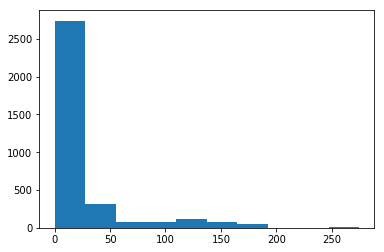

In [14]:
m2 = d2.mean().values

plt.hist(m2)

In [103]:
pc = 0
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)

Text(0.5,1,'Principal Component 1')

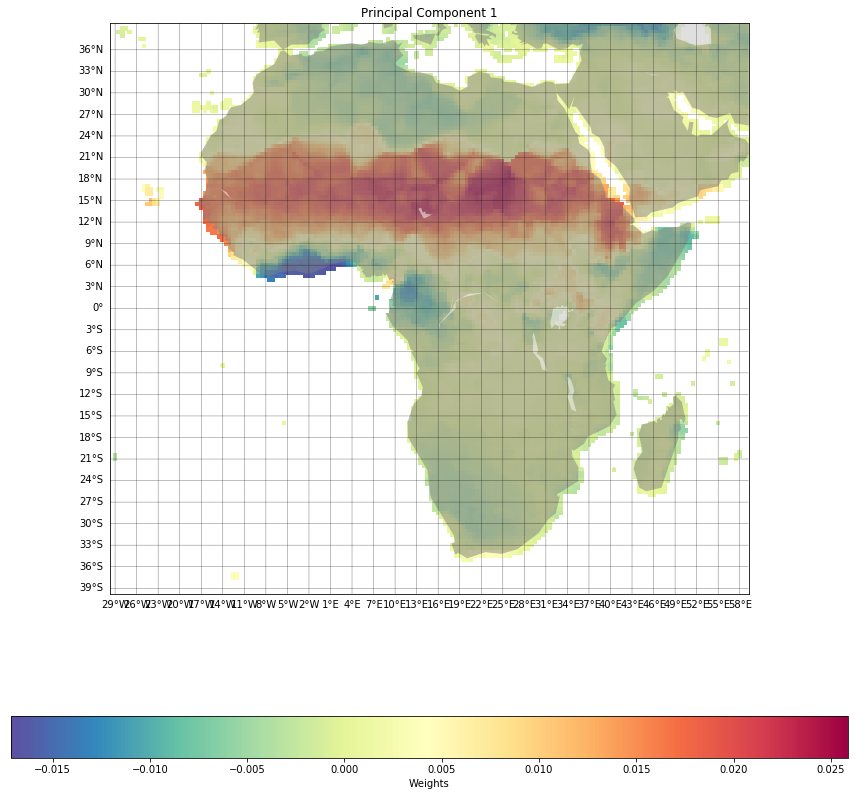

In [104]:
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 2')

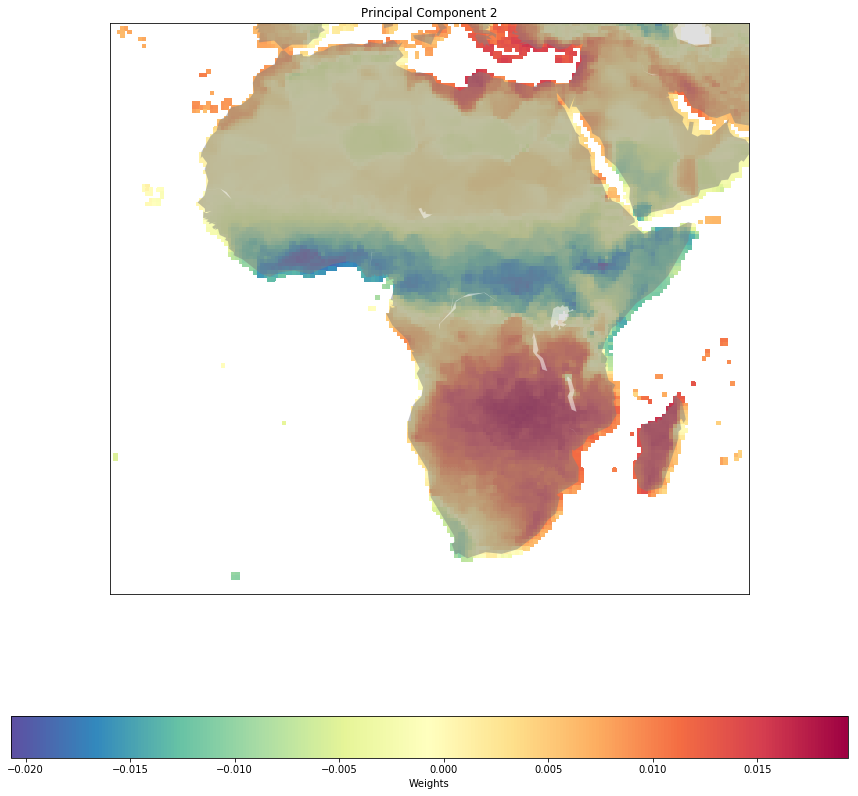

In [105]:
pc = 1
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 3')

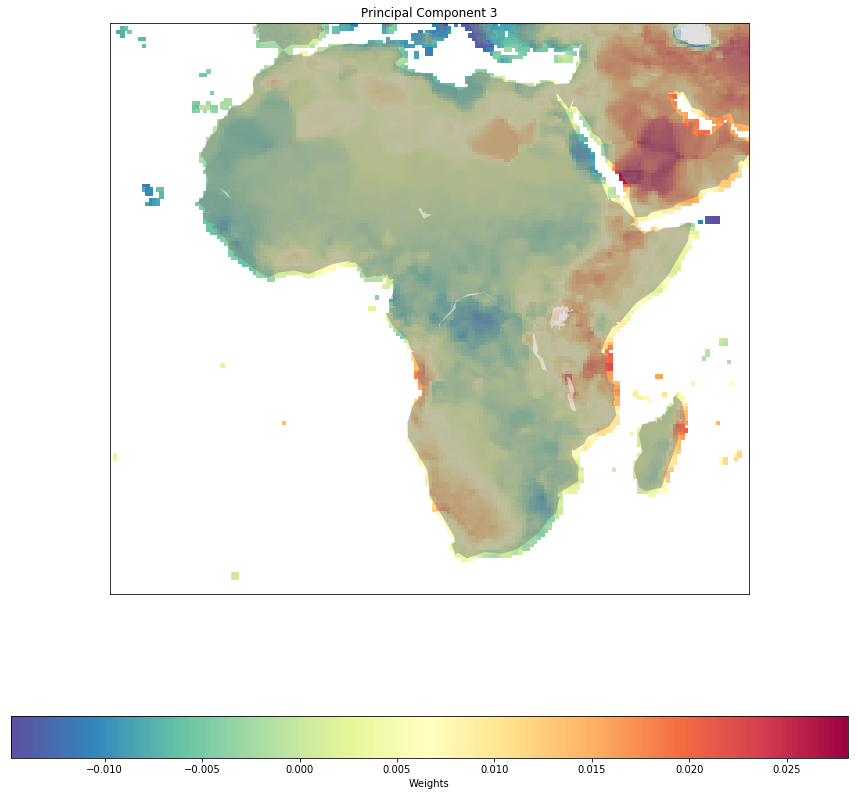

In [106]:
pc = 2
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 4')

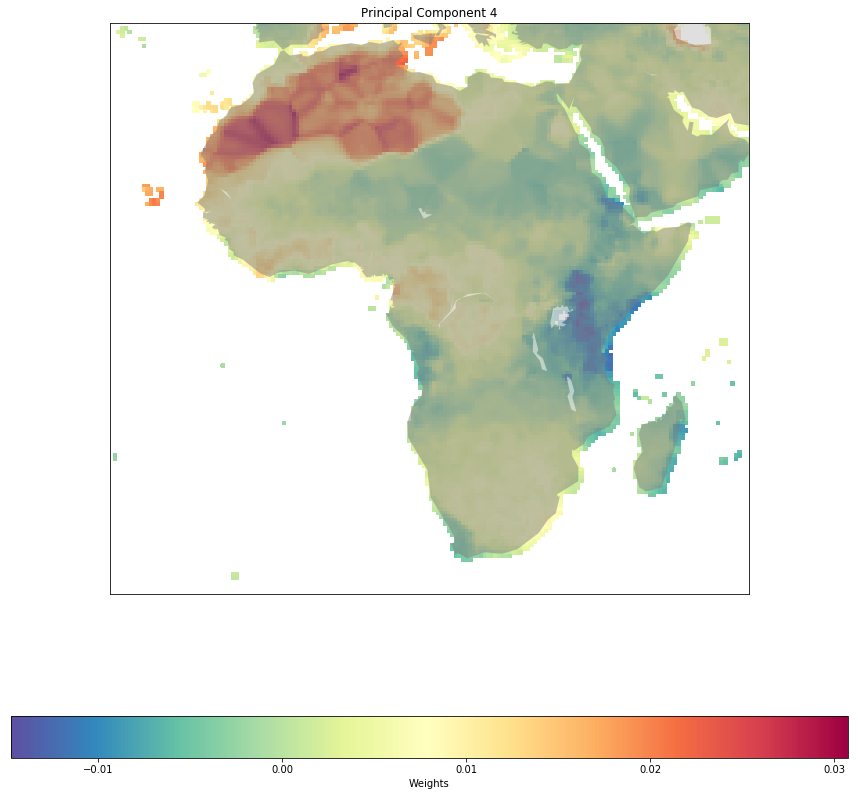

In [107]:
pc = 3
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 5')

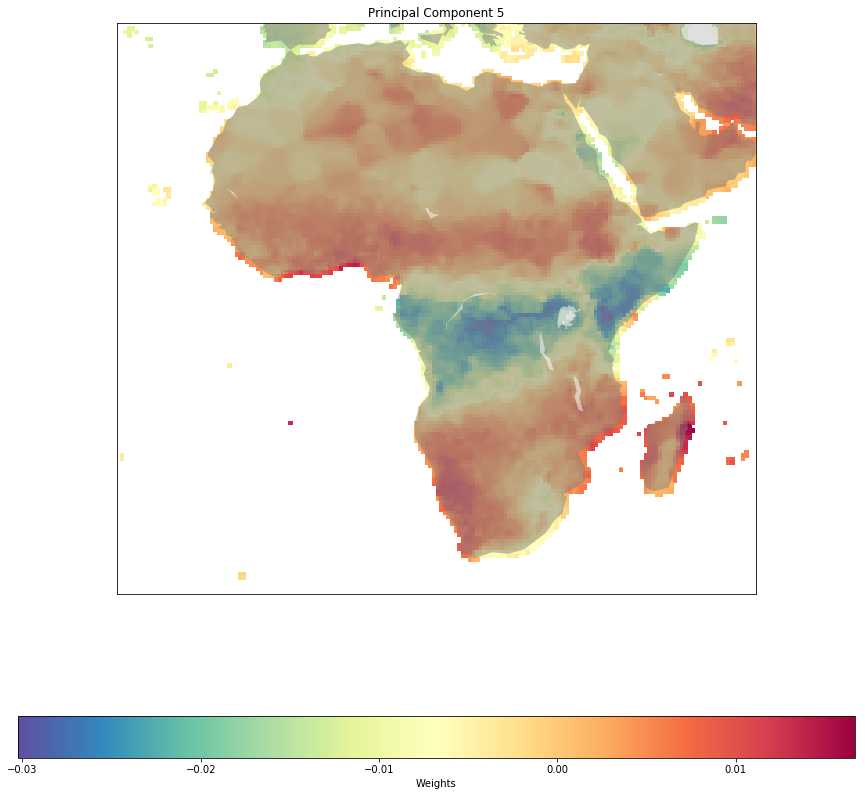

In [108]:
pc = 4
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

# Discovery of Causality links

In [41]:
var_names = loading.columns

#pca_data = pca_model.transform(data)
pca_data = result.dot(loading)
pca_data = np.matrix(pca_data)

dataframe = pp.DataFrame(pca_data,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [52]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val = 0.250
        (1 -1): pval = 0.01038 | val = -0.090

    Variable 1 has 2 link(s):
        (1 -1): pval = 0.00000 | val = 0.220
        (0 -2): pval = 0.02623 | val = 0.078

    Variable 2 has 2 link(s):
        (2 -1): pval = 0.00000 | val = 0.271
        (1 -1): pval = 0.00046 | val = -0.123

    Variable 3 has 2 link(s):
        (3 -1): pval = 0.00000 | val = 0.215
        (0 -2): pval = 0.01501 | val = 0.086

    Variable 4 has 4 link(s):
        (4 -1): pval = 0.00000 | val = 0.192
        (1 -1): pval = 0.00068 | val = -0.119
        (3 -2): pval = 0.01345 | val = -0.087
        (0 -2): pval = 0.03752 | val = -0.073


(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc23d11a940>)

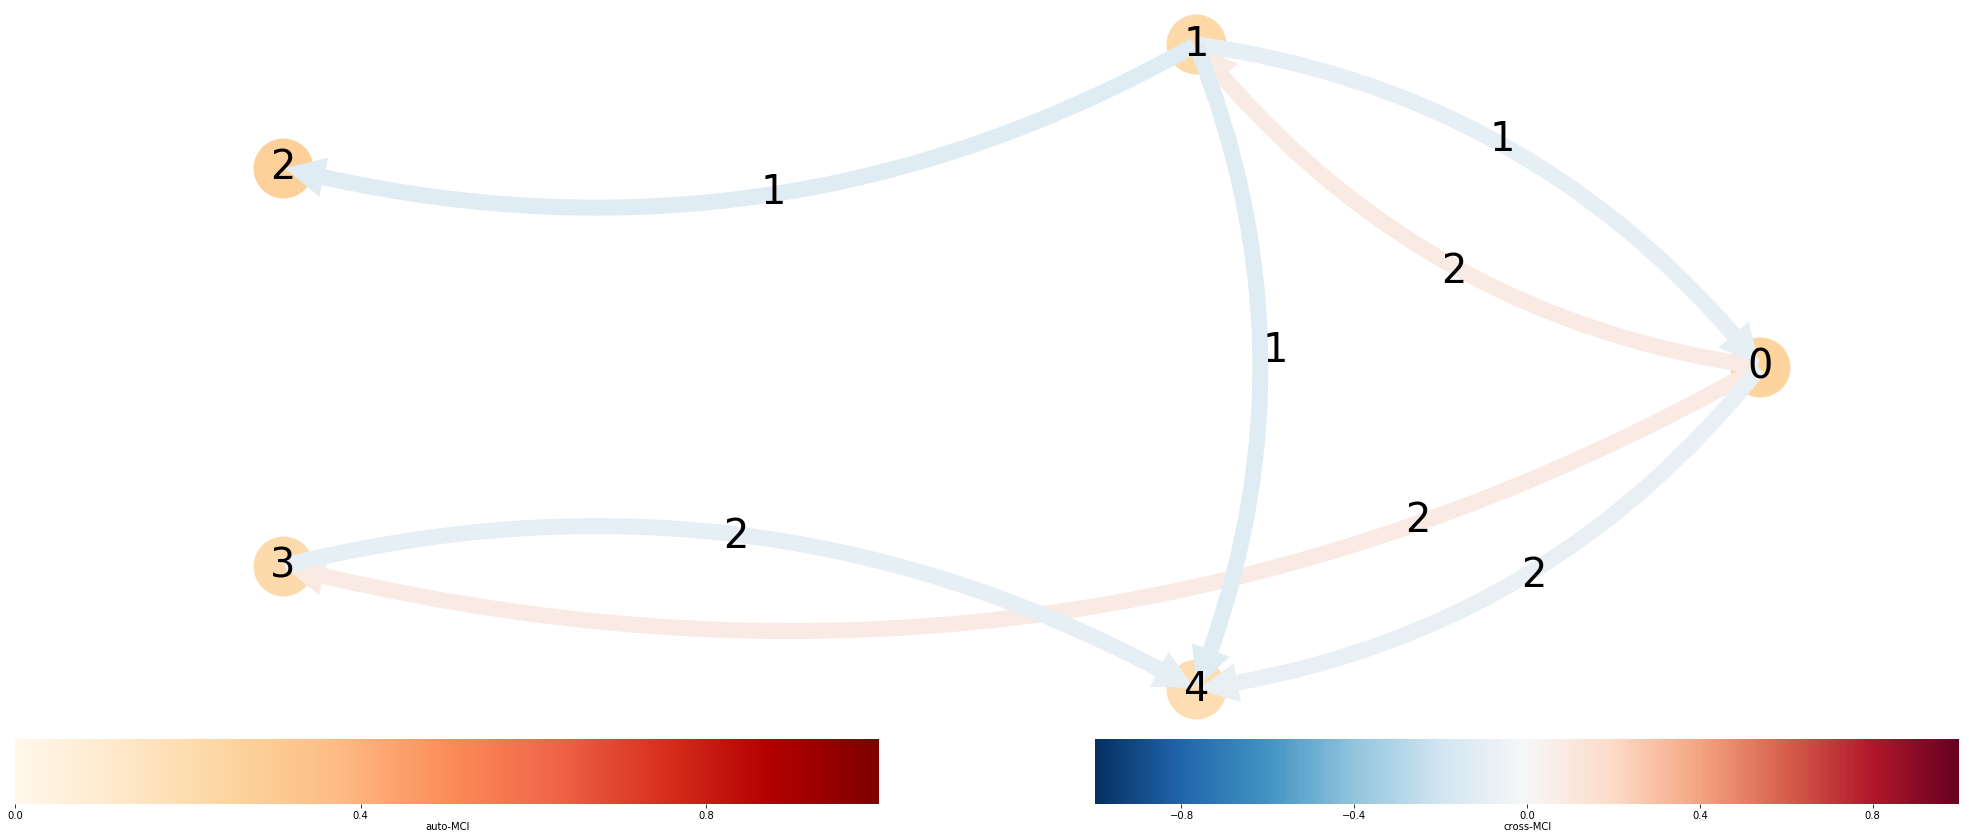

In [53]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

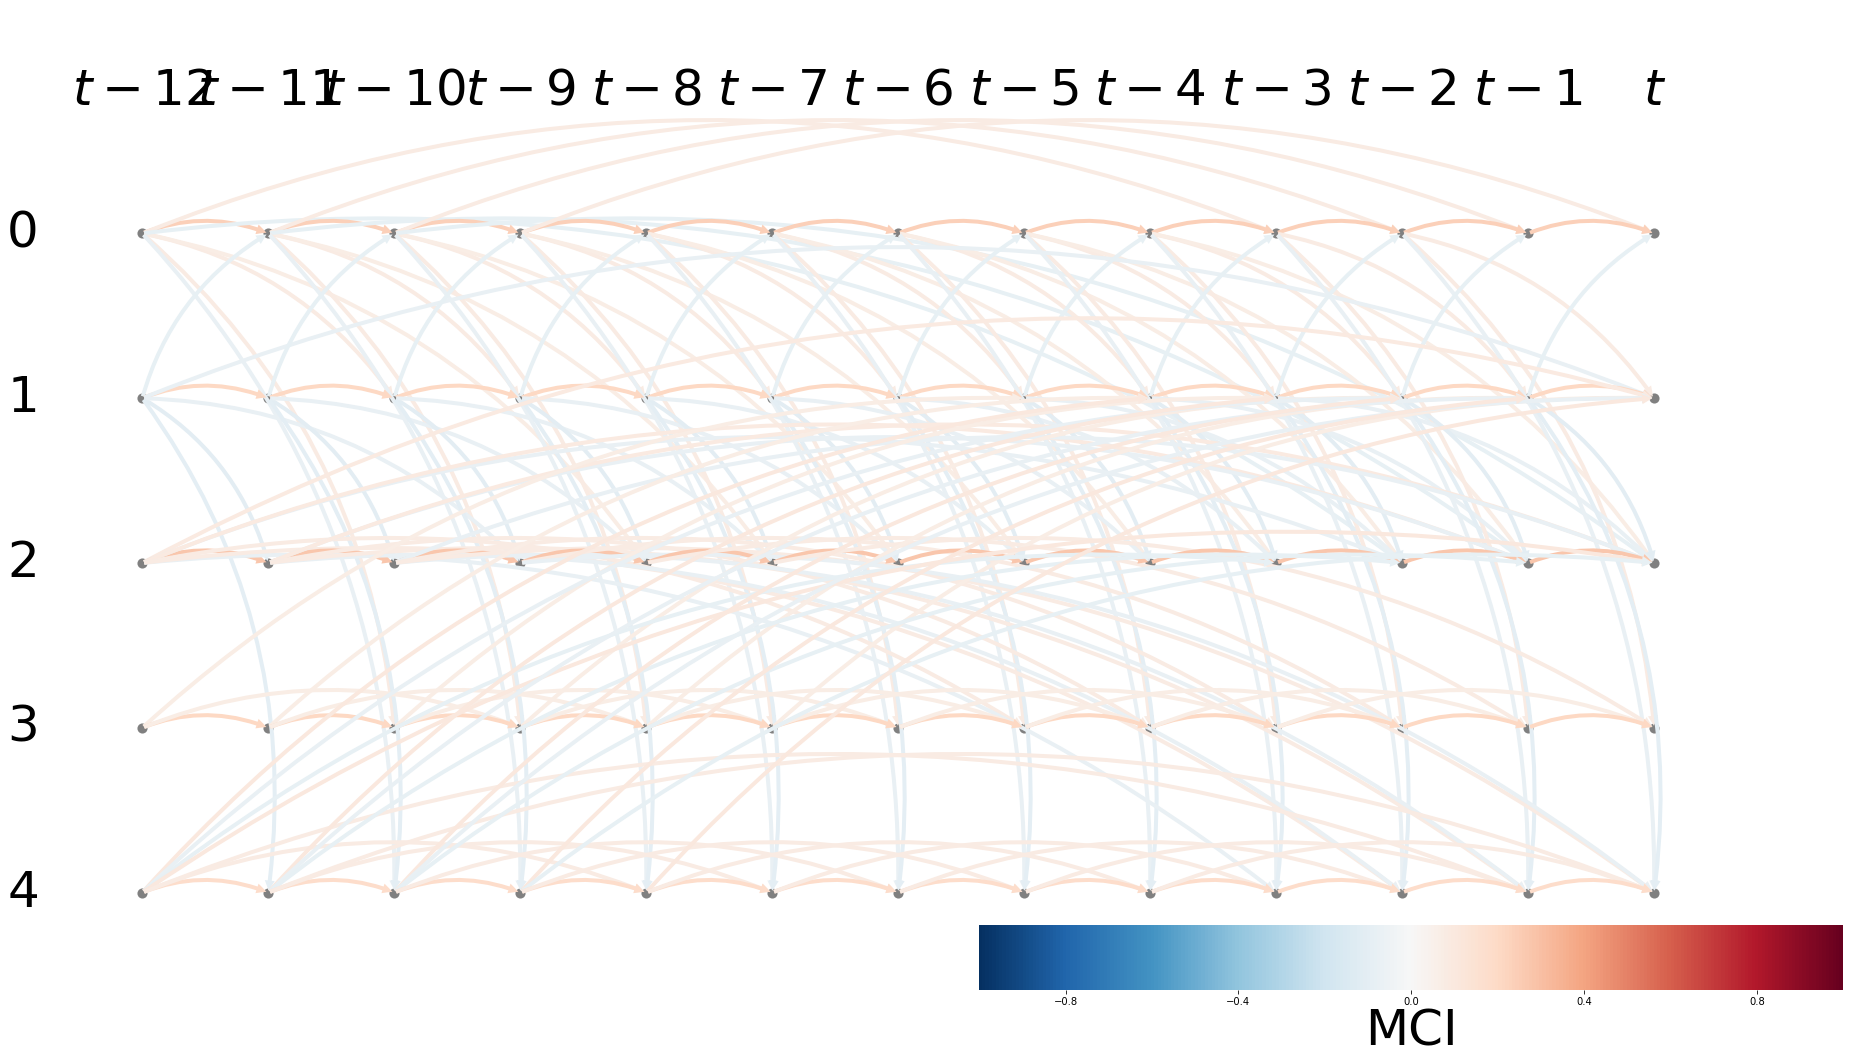

In [36]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='MCI',figsize=(30,15),
    node_label_size=100,
    label_fontsize = 50
    )

# Benjamini–Hochberg procedure for False discovery rate

In [57]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.1)


## Significant links at alpha = 0.1:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.250
        (1 -1): pval = 0.01038 | qval = 0.06486 | val = -0.090

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.220

    Variable 2 has 2 link(s):
        (2 -1): pval = 0.00000 | qval = 0.00000 | val = 0.271
        (1 -1): pval = 0.00046 | qval = 0.00382 | val = -0.123

    Variable 3 has 2 link(s):
        (3 -1): pval = 0.00000 | qval = 0.00000 | val = 0.215
        (0 -2): pval = 0.01501 | qval = 0.07503 | val = 0.086

    Variable 4 has 3 link(s):
        (4 -1): pval = 0.00000 | qval = 0.00000 | val = 0.192
        (1 -1): pval = 0.00068 | qval = 0.00489 | val = -0.119
        (3 -2): pval = 0.01345 | qval = 0.07473 | val = -0.087


(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc23d1ba278>)

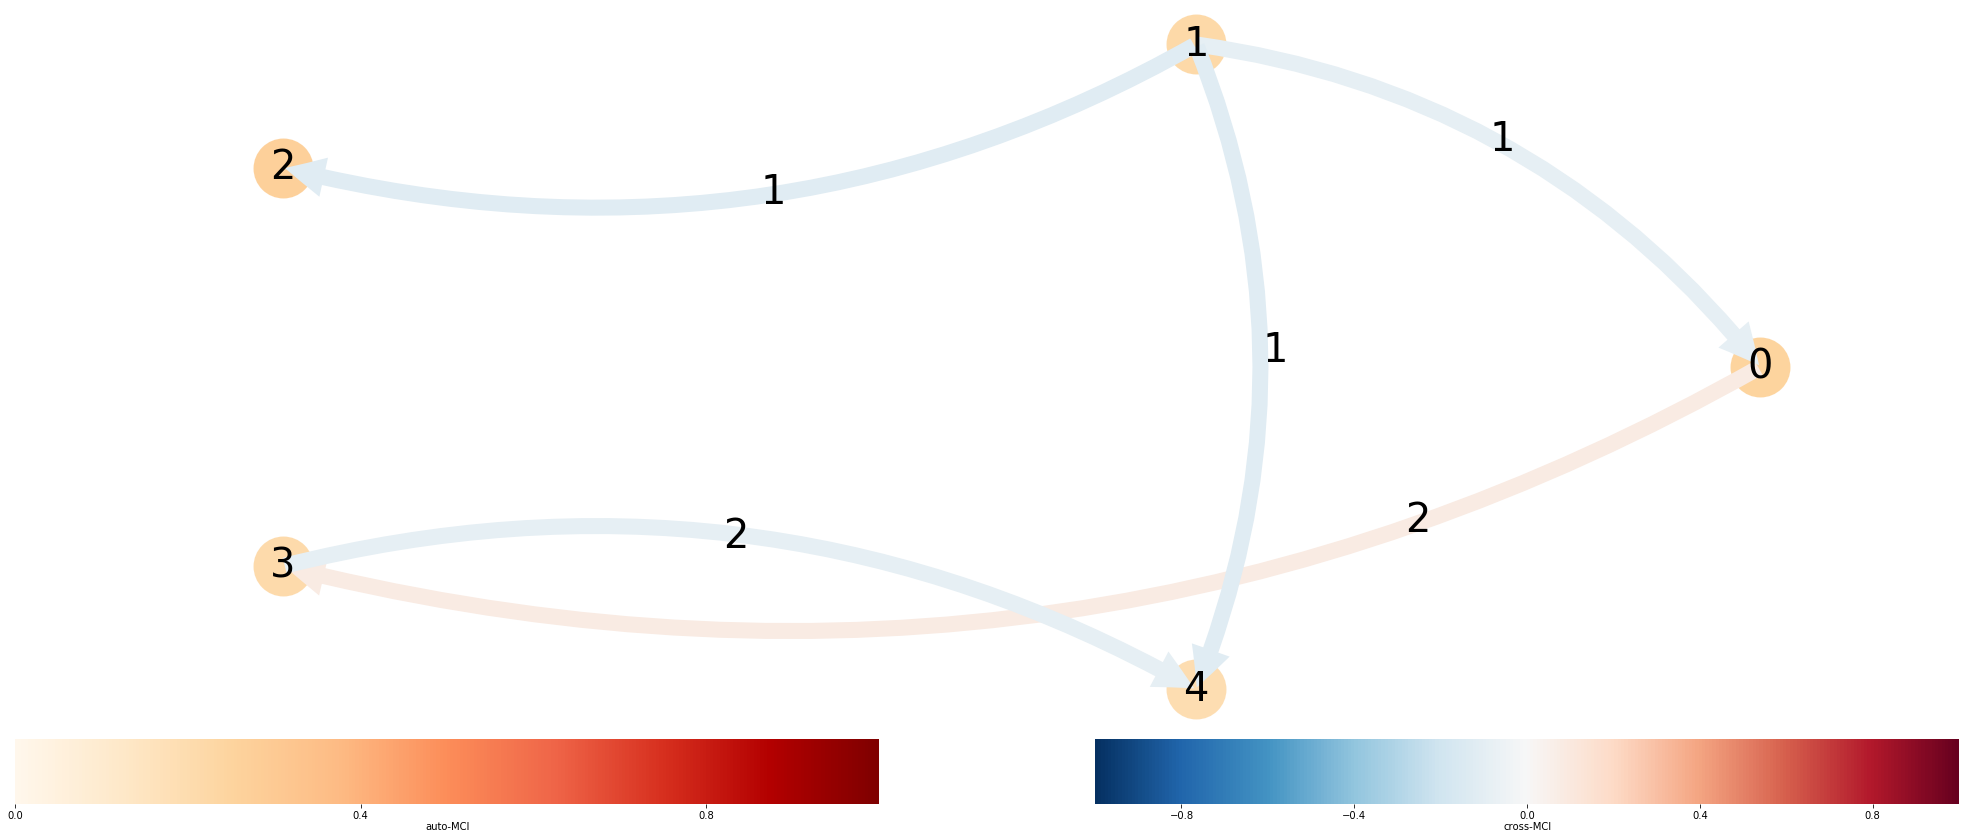

In [58]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.1)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

# Adding SST

In [112]:
sst = Data('sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()

result_sst = pf.deseasonalize(np.array(result_sst))
data_sst = pd.DataFrame(result_sst)

#result_sst = pf.deseasonalize(np.array(result_sst))
n_components_sst = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_sst)

pca = PCA(n_components=n_components_sst)
pca_model = pca.fit(scaled_data)

#pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix1 = Matrix1/Matrix1.sum(axis=0)
#Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)


#loading_sst = pd.DataFrame(pf.varimax(Matrix, q=1000))
loading_sst = pd.DataFrame(Matrix)
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

clusters = loading_sst.idxmax(axis=1)
df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clusters.values.tolist()})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

# Adding Air pressure

In [113]:
pres = Data('pres.mon.mean.nc','pres',temporal_limits, missing_value= -9.96921e+36)

result_pres = pres.get_data()
lon_pres_list = pres.get_lon_list()
lat_pres_list = pres.get_lat_list()
lon_pres = pres.get_lon()
lat_pres = pres.get_lat()

result_pres = pf.deseasonalize(np.array(result_pres))
data_pres = pd.DataFrame(result_pres)

#result_pres = pf.deseasonalize(np.array(result_pres))
n_components_pres = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_pres)

pca = PCA(n_components=n_components_pres)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


#loading_pres = pd.DataFrame(pf.varimax(Matrix, q=1000))
loading_pres = pd.DataFrame(Matrix)

clusters = loading_pres.idxmax(axis=1)
df_pres = pd.DataFrame({"lons":lon_pres_list,"lats":lat_pres_list,"clusters":clusters.values.tolist()})

lon_temp = df_pres["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_pres["lons"].vlues = lon_temp

# Adding Air temperature

In [114]:
air = Data('air.mon.mean.nc','air',temporal_limits, missing_value= -9.96921e+36)

result_air = air.get_data()
lon_air_list = air.get_lon_list()
lat_air_list = air.get_lat_list()
lon_air = air.get_lon()
lat_air = air.get_lat()

result_air = pf.deseasonalize(np.array(result_air))
data_air = pd.DataFrame(result_air)

#result_air = pf.deseasonalize(np.array(result_air))
n_components_air = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_air)

pca = PCA(n_components=n_components_air)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


#loading_air = pd.DataFrame(pf.varimax(Matrix, q=1000))
loading_air = pd.DataFrame(Matrix)

clusters = loading_air.idxmax(axis=1)
df_air = pd.DataFrame({"lons":lon_air_list,"lats":lat_air_list,"clusters":clusters.values.tolist()})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"].vlues = lon_temp

# Discovery of Causality links

In [115]:
pres_name  = []
for i in range(n_components_pres):
    pres_name.append("Pres_%d"%i)

air_name  = []
for i in range(n_components_air):
    air_name.append("Air_%d"%i)

sst_name  = []
for i in range(n_components_sst):
    sst_name.append("SST_%d"%i)

precip_name  = []
for i in range(n_components):
    precip_name.append("Precipitation_%d"%i)

var_names = precip_name + sst_name + air_name + pres_name

result_precip = result.dot(loading)
result_sst = result_sst.dot(loading_sst)
result_air = result_air.dot(loading_air)
result_pres = result_pres.dot(loading_pres)

result = np.concatenate((result_precip, result_sst, result_air, result_pres), axis=1)
result = np.matrix(result)

In [116]:
dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [117]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable Precipitation_0 has 20 link(s):
        (Pres_4 0): pval = 0.00000 | val = 0.251
        (Pres_7 0): pval = 0.00000 | val = 0.217
        (Precipitation_0 -1): pval = 0.00000 | val = 0.204
        (SST_1 0): pval = 0.00003 | val = -0.149
        (Pres_3 -1): pval = 0.00083 | val = -0.119
        (Pres_9 0): pval = 0.00102 | val = -0.117
        (Air_3 0): pval = 0.00123 | val = 0.115
        (Pres_6 0): pval = 0.00138 | val = 0.114
        (SST_0 0): pval = 0.00401 | val = 0.103
        (SST_5 -2): pval = 0.00435 | val = 0.102
        (SST_4 -1): pval = 0.00656 | val = -0.097
        (SST_2 0): pval = 0.00675 | val = 0.096
        (Pres_5 0): pval = 0.00949 | val = -0.092
        (Air_0 0): pval = 0.01885 | val = 0.084
        (SST_6 0): pval = 0.02219 | val = 0.082
        (Precipitation_2 -1): pval = 0.02486 | val = 0.080
        (Air_6 -1): pval = 0.02894 | val = -0.078
        (Precipitation_1 -1): pval = 0.03445 | val = -0.075
 

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc41142f710>)

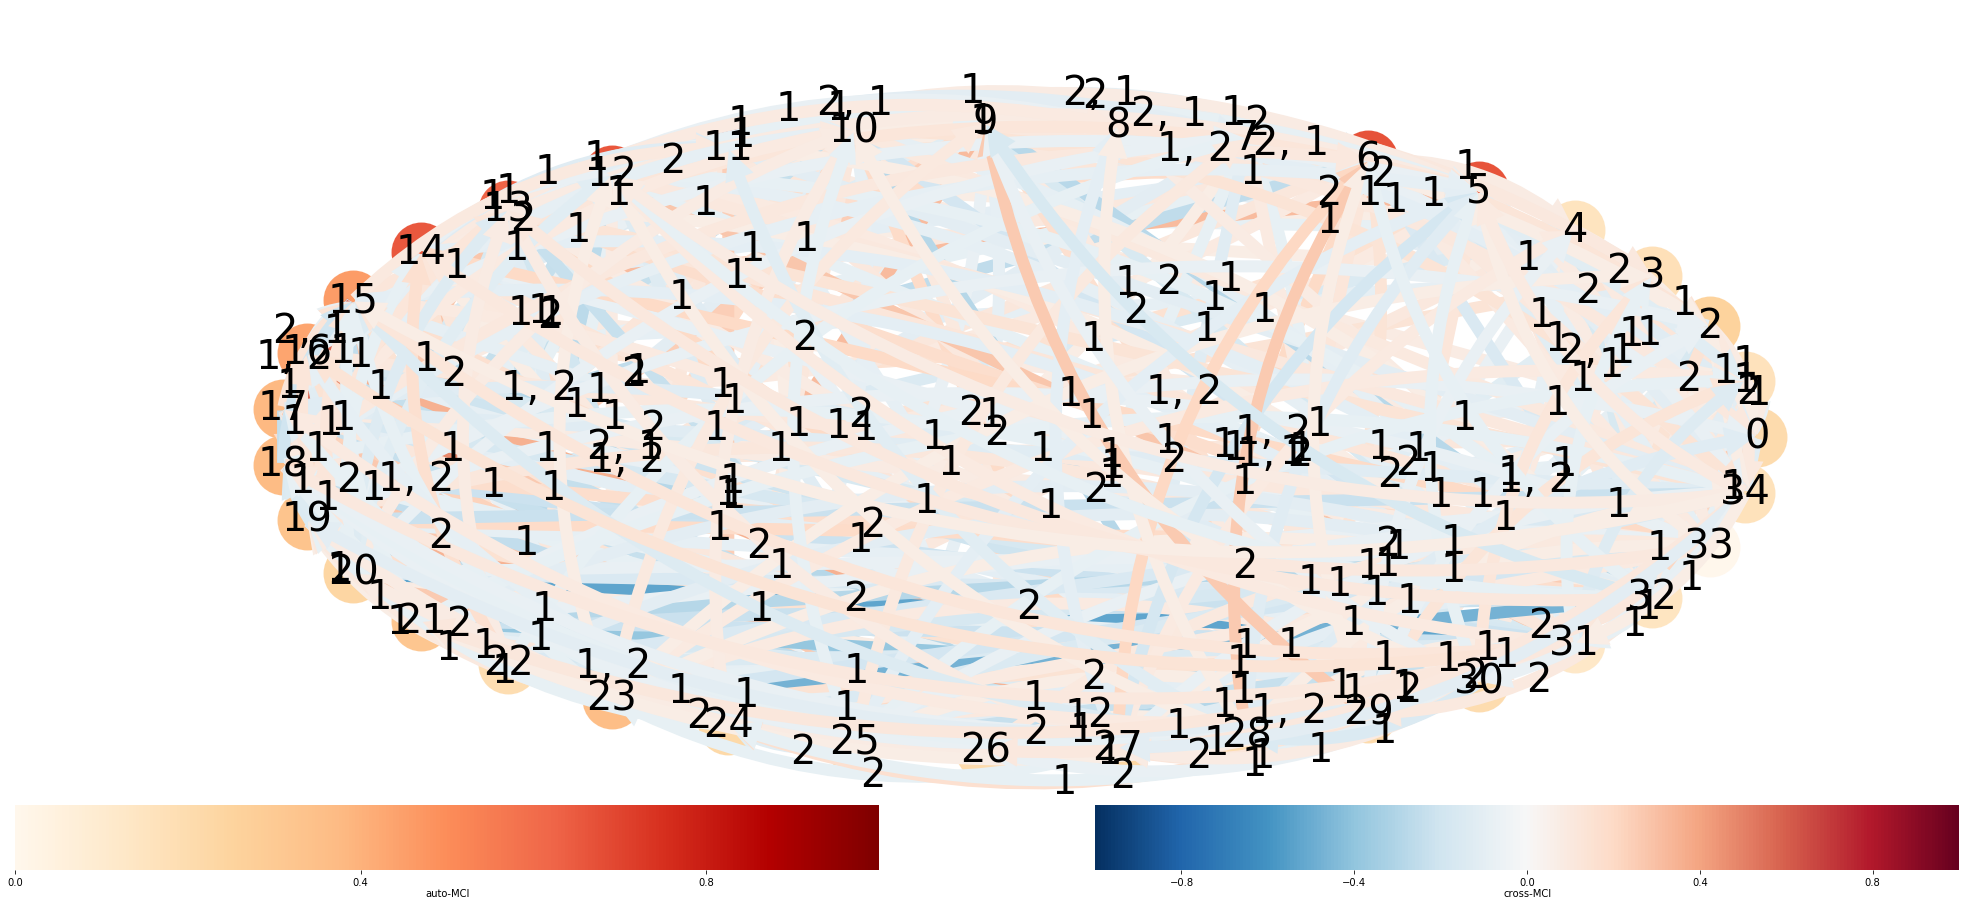

In [127]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )

In [123]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.05)


## Significant links at alpha = 0.05:

    Variable Precipitation_0 has 14 link(s):
        (Pres_4 0): pval = 0.00000 | qval = 0.00000 | val = 0.251
        (Pres_7 0): pval = 0.00000 | qval = 0.00000 | val = 0.217
        (Precipitation_0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.204
        (SST_1 0): pval = 0.00003 | qval = 0.00003 | val = -0.149
        (Pres_3 -1): pval = 0.00083 | qval = 0.02585 | val = -0.119
        (Pres_9 0): pval = 0.00102 | qval = 0.00102 | val = -0.117
        (Air_3 0): pval = 0.00123 | qval = 0.00123 | val = 0.115
        (Pres_6 0): pval = 0.00138 | qval = 0.00138 | val = 0.114
        (SST_0 0): pval = 0.00401 | qval = 0.00401 | val = 0.103
        (SST_2 0): pval = 0.00675 | qval = 0.00675 | val = 0.096
        (Pres_5 0): pval = 0.00949 | qval = 0.00949 | val = -0.092
        (Air_0 0): pval = 0.01885 | qval = 0.01885 | val = 0.084
        (SST_6 0): pval = 0.02219 | qval = 0.02219 | val = 0.082
        (Pres_8 0): pval = 0.03995 | qval = 0.03

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc411bc1c88>)

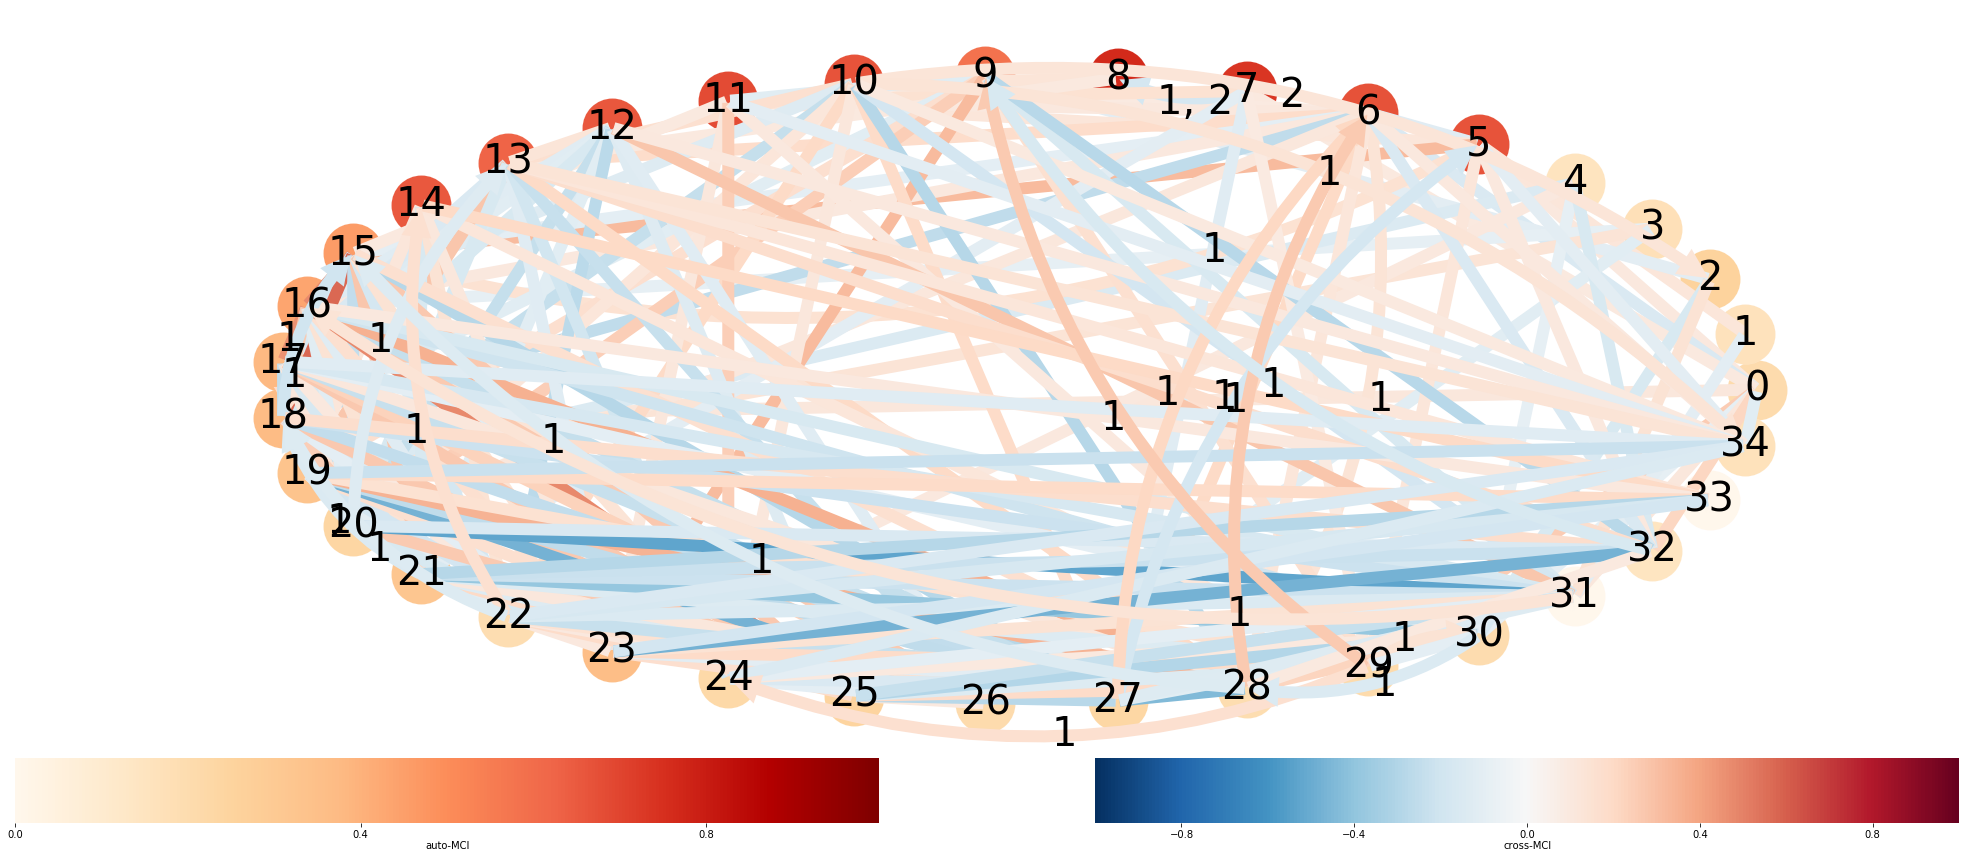

In [125]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(data)

X_embedded.shape

s = np.sum(data, axis=1)

#base = datetime(2016, 1, 1, 0, 0)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
r = np.arange(len(s[-400:]))
plt.plot(r,s[-400:])
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   #to get a tick every 15 minutes
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall (mm)", fontsize = 20)
plt.title("Monthly rainfall steppe climate classification", fontsize = 25)
plt.grid()



vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]
plt.scatter(vis_x, vis_y, c = clustering.labels_)
plt.colorbar(ticks=range(9))
plt.legend(clustering.labels_)
plt.clim(-0.5, 9.5)
plt.show()

clustering = AgglomerativeClustering(n_clusters=9).fit(X_embedded)

np.where(clustering.labels_ == 2)